In [1]:
!pip install tensorflow==1.8.0

     |████████████████████████████████| 49.1MB 78kB/s 
     |████████████████████████████████| 3.1MB 48.3MB/s 
     |████████████████████████████████| 890kB 36.9MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=ed4a6687fdae9827c8823c748af60d8cc72dde51a3f08f114bb800d8a52082e3
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.2.1
    Uninstalling bleach-3.2.1:
      Successfully uninstalled bleach-3.2.1
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Air.csv')
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
data['neighbourhood_group'].value_counts()
#OrdinalEncoding의 대상

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [5]:
data['neighbourhood'].value_counts()

# one hot encoding의 대상

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Rossville                1
New Dorp                 1
Richmondtown             1
Willowbrook              1
Fort Wadsworth           1
Name: neighbourhood, Length: 221, dtype: int64

In [6]:
data['room_type'].value_counts()
#OrdinalEncoding의 대상

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbdc84585f8>,
      dtype=object)

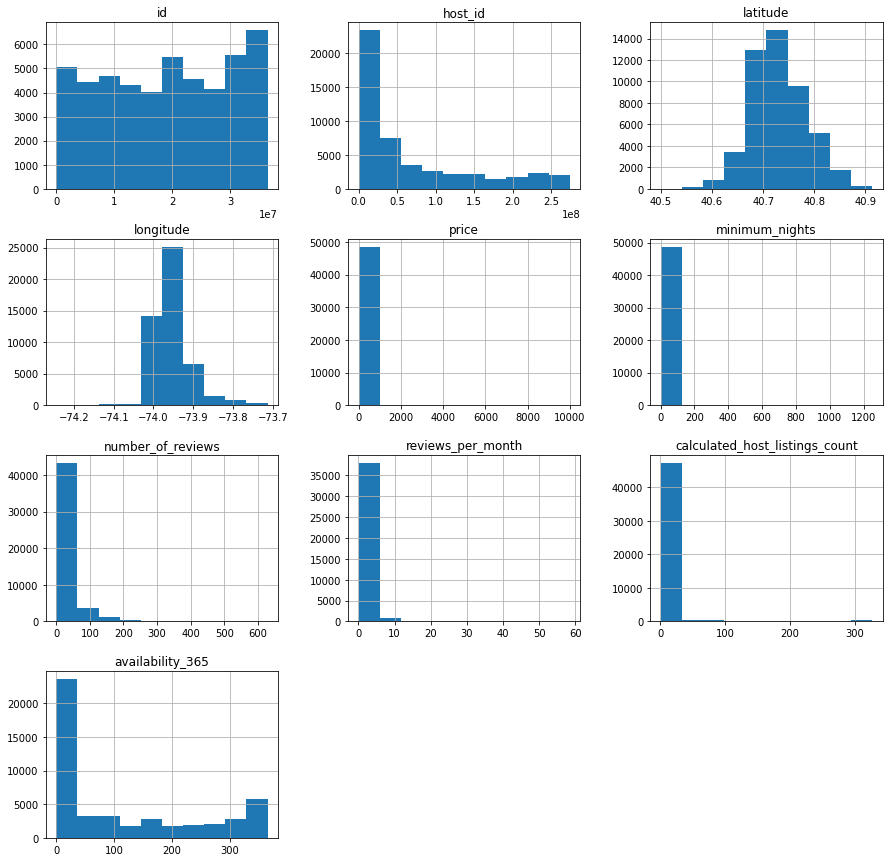

In [7]:
data.hist(figsize=(15,15))

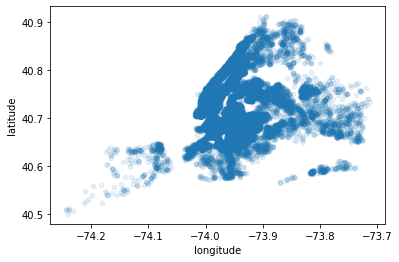

In [8]:
data.plot(kind="scatter",x='longitude',y='latitude',alpha=0.1)

No handles with labels found to put in legend.


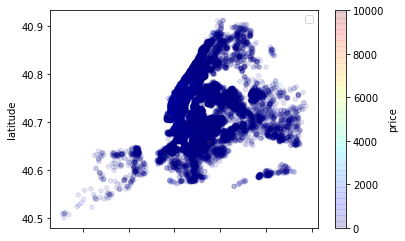

In [9]:
data.plot(kind="scatter", x="longitude", y='latitude', alpha=0.1,
             c = "price", cmap=plt.get_cmap('jet'), colorbar = True)
plt.legend()

In [10]:
data.isnull().sum()
#결측값 판단 이름과 호스트 네임은 아마 영향을 끼치지 않을것 같다 삭제하자


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
data2 = data.copy()
del data2['id']
del data2['name']
del data2['host_id']
del data2['host_name']


In [12]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   last_review                     38843 non-null  object 
 9   reviews_per_month               38843 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(

In [13]:
#혹여나 리뷰가 있는데도 nan이 존재할수 있음
count = 0
for i in range(len(data2['last_review'])):
  if  data2['number_of_reviews'][i] == 0 and np.isnan(data2['reviews_per_month'][i]):
    count = count + 1
count

10052

In [14]:
count = 0
for i in range(len(data['last_review'])):
  if  data2['number_of_reviews'][i] == 0 and np.isnan(data2['last_review'][i]):
    count = count + 1
count

#다행히 없음

10052

In [15]:
data2['reviews_per_month'] = data2['reviews_per_month'].fillna(0)

In [16]:
data2.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [17]:
data2['last_review'] = data2['last_review'].fillna(0000-00-00)

In [18]:
data2.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [19]:
data2['last_review'] = pd.to_datetime(data2['last_review'],format='%Y-%m-%d')

In [20]:
data2['last_review_year'] = data2['last_review'].dt.year
data2['last_review_month'] = data2['last_review'].dt.month
data2['last_review_day'] = data2['last_review'].dt.day

In [21]:
data2

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month,last_review_day
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018,10,19
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019,5,21
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1970-01-01,0.00,1,365,1970,1,1
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019,7,5
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018,11,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,1970-01-01,0.00,2,9,1970,1,1
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,1970-01-01,0.00,2,36,1970,1,1
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1970-01-01,0.00,1,27,1970,1,1
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,1970-01-01,0.00,6,2,1970,1,1


In [22]:
del data2['last_review']

In [23]:
from sklearn.preprocessing import OrdinalEncoder

ordinal = OrdinalEncoder()
root_t = ordinal.fit_transform(data2[['room_type']])
root_t[:10]

array([[1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.]])

In [24]:
data2["room_type"] = root_t[:,0]

In [25]:
neigh = ordinal.fit_transform(data2[['neighbourhood_group']])
neigh[:10]

array([[1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.]])

In [26]:
data2['neighbourhood_group'] = neigh[:,0]

In [27]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  float64
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  float64
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               48895 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
 11  last_review_year                48895 non-null  int64  
 12  last_review_month               

In [28]:
from sklearn.preprocessing import OneHotEncoder

one = OneHotEncoder()
neighbour = one.fit_transform(data2[['neighbourhood']])
neighbour[:1].toarray()
neighbour.shape
data2['neighbourhood'] = np.argmax(neighbour, axis=1).reshape(-1,1)

In [29]:
data2

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month,last_review_day
0,1.0,108,40.64749,-73.97237,1.0,149,1,9,0.21,6,365,2018,10,19
1,2.0,127,40.75362,-73.98377,0.0,225,1,45,0.38,2,355,2019,5,21
2,2.0,94,40.80902,-73.94190,1.0,150,3,0,0.00,1,365,1970,1,1
3,1.0,41,40.68514,-73.95976,0.0,89,1,270,4.64,1,194,2019,7,5
4,2.0,61,40.79851,-73.94399,0.0,80,10,9,0.10,1,0,2018,11,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,1.0,13,40.67853,-73.94995,1.0,70,2,0,0.00,2,9,1970,1,1
48891,1.0,28,40.70184,-73.93317,1.0,40,4,0,0.00,2,36,1970,1,1
48892,2.0,94,40.81475,-73.94867,0.0,115,10,0,0.00,1,27,1970,1,1
48893,2.0,95,40.75751,-73.99112,2.0,55,1,0,0.00,6,2,1970,1,1


In [30]:
data_num = data2.drop('neighbourhood',axis=1)

In [31]:
data2_corr = data2.corr()
data2_corr

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month,last_review_day
neighbourhood_group,1.000000,0.111333,0.279560,0.101171,-0.016337,0.044246,0.017404,0.003853,0.053028,0.073671,0.080450,-0.024880,-0.014883,-0.028493
neighbourhood,0.111333,1.000000,0.234793,-0.102381,-0.071964,0.062057,0.026000,-0.038342,-0.051853,0.010327,-0.034655,-0.032537,-0.020500,-0.013065
latitude,0.279560,0.234793,1.000000,0.084788,0.006481,0.033939,0.024869,-0.015389,-0.018758,0.019517,-0.010983,-0.030340,-0.021452,-0.016540
longitude,0.101171,-0.102381,0.084788,1.000000,0.184341,-0.150019,-0.062747,0.059094,0.138516,-0.114713,0.082731,0.048380,0.030077,0.014394
room_type,-0.016337,-0.071964,0.006481,0.184341,1.000000,-0.249350,-0.069792,0.002724,0.026606,-0.106055,0.022500,-0.020054,-0.013071,-0.012534
price,0.044246,0.062057,0.033939,-0.150019,-0.249350,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829,-0.085683,-0.055903,-0.052182
minimum_nights,0.017404,0.026000,0.024869,-0.062747,-0.069792,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.144303,-0.113168,-0.083080,-0.060531
number_of_reviews,0.003853,-0.038342,-0.015389,0.059094,0.002724,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.172028,0.279516,0.176824,0.169770
reviews_per_month,0.053028,-0.051853,-0.018758,0.138516,0.026606,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.163732,0.368354,0.238284,0.178889
calculated_host_listings_count,0.073671,0.010327,0.019517,-0.114713,-0.106055,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.225701,-0.115883,-0.094138,-0.057470


In [32]:
data2_corr['price'].sort_values()

room_type                        -0.249350
longitude                        -0.150019
last_review_year                 -0.085683
last_review_month                -0.055903
last_review_day                  -0.052182
reviews_per_month                -0.050564
number_of_reviews                -0.047954
latitude                          0.033939
minimum_nights                    0.042799
neighbourhood_group               0.044246
calculated_host_listings_count    0.057472
neighbourhood                     0.062057
availability_365                  0.081829
price                             1.000000
Name: price, dtype: float64

In [33]:
data2


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month,last_review_day
0,1.0,108,40.64749,-73.97237,1.0,149,1,9,0.21,6,365,2018,10,19
1,2.0,127,40.75362,-73.98377,0.0,225,1,45,0.38,2,355,2019,5,21
2,2.0,94,40.80902,-73.94190,1.0,150,3,0,0.00,1,365,1970,1,1
3,1.0,41,40.68514,-73.95976,0.0,89,1,270,4.64,1,194,2019,7,5
4,2.0,61,40.79851,-73.94399,0.0,80,10,9,0.10,1,0,2018,11,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,1.0,13,40.67853,-73.94995,1.0,70,2,0,0.00,2,9,1970,1,1
48891,1.0,28,40.70184,-73.93317,1.0,40,4,0,0.00,2,36,1970,1,1
48892,2.0,94,40.81475,-73.94867,0.0,115,10,0,0.00,1,27,1970,1,1
48893,2.0,95,40.75751,-73.99112,2.0,55,1,0,0.00,6,2,1970,1,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbdbcbbd588>,
      dtype=object)

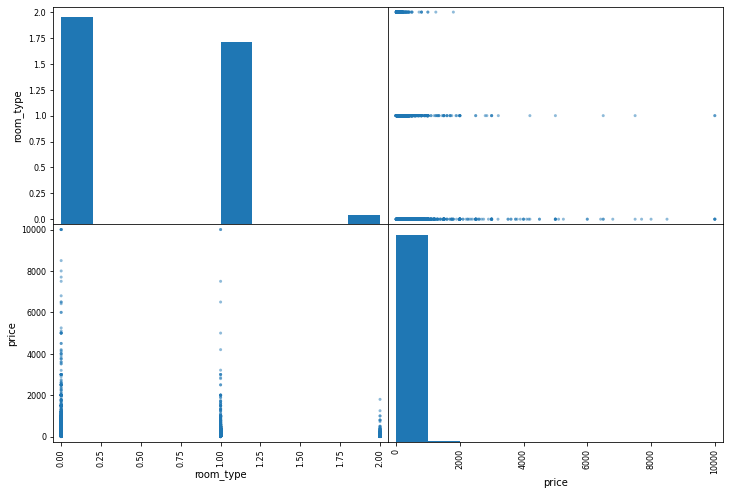

In [34]:
from pandas.plotting import scatter_matrix

data_num = list(data2_corr)
scatter_matrix(data2[['room_type','price']], figsize=(12,8))

In [35]:
data_y = data2['price']
del data2['price']

In [36]:
data2 = data2.astype(np.float32)
data_y = data_y.astype(np.float32)

In [37]:
import tensorflow as tf



/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:522: FutureWarning: Passing (type, 1) or 

In [38]:
data2.shape

(48895, 13)

In [39]:
X = tf.placeholder(tf.float32,shape=[None,13])


Y = tf.placeholder(tf.float32,shape=[None, 1])
W = tf.Variable(tf.random_normal([13,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

In [40]:
hypothesis = tf.matmul(X,W) + b

In [68]:
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# cost function 최소화
optimizer = tf.train.AdamOptimizer(learning_rate=0.005)
train = optimizer.minimize(cost)

In [42]:
print(1)

1


In [45]:
data_y = np.array(data_y).reshape(len(data_y),1)


In [69]:
with tf.Session() as sess:
    # 사용할 변수 선언
    sess.run(tf.global_variables_initializer())
    for step in range(50000):
        cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                       feed_dict={X: data2,Y: data_y})
        if step % 2000 == 0:
          print(step, "Cost: ", cost_val)
    print("\n=== Test ===")
    predict = sess.run(hypothesis,feed_dict={X:data2})


0 Cost:  6966773.5
2000 Cost:  59334.77
4000 Cost:  56312.258
6000 Cost:  55898.0
8000 Cost:  55409.27
10000 Cost:  54928.406
12000 Cost:  54498.613
14000 Cost:  54126.668
16000 Cost:  53789.875
18000 Cost:  53504.613
20000 Cost:  53273.89
22000 Cost:  53102.164
24000 Cost:  52982.85
26000 Cost:  52910.46
28000 Cost:  52876.25
30000 Cost:  52862.41
32000 Cost:  52854.664
34000 Cost:  52848.73
36000 Cost:  52844.21
38000 Cost:  52842.426
40000 Cost:  52838.117
42000 Cost:  52837.855
44000 Cost:  52834.39
46000 Cost:  52833.207
48000 Cost:  52832.105

=== Test ===


In [66]:
predict[0:20]

array([[135.72336 ],
       [243.73686 ],
       [193.06412 ],
       [148.16548 ],
       [182.98886 ],
       [198.4137  ],
       [ 48.3565  ],
       [ 29.334993],
       [ 68.60623 ],
       [178.98161 ],
       [189.1698  ],
       [ 44.03816 ],
       [100.61136 ],
       [129.34444 ],
       [195.34445 ],
       [168.99397 ],
       [191.62488 ],
       [ 18.755974],
       [156.38342 ],
       [277.10492 ]], dtype=float32)

In [57]:
data_y[0:20]

array([[149.],
       [225.],
       [150.],
       [ 89.],
       [ 80.],
       [200.],
       [ 60.],
       [ 79.],
       [ 79.],
       [150.],
       [135.],
       [ 85.],
       [ 89.],
       [ 85.],
       [120.],
       [140.],
       [215.],
       [140.],
       [ 99.],
       [190.]], dtype=float32)